# Assignment 3

## PART A : Prerequisite for linear regression implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X : [1 1 2 3 4 3 4 6 4]
Y: [1 1 2 2 3 2 3 4 3]


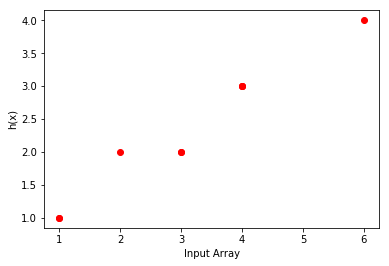

In [2]:
x = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
t0 = 1.2
t1 = 0.5

y = np.empty(9, dtype = int)

for i in range(0, len(x)):
    y[i] = t0 + t1*x[i]
    
print(f'X : {x}\nY: {y}')

plt.plot(x, y, 'ro')
plt.xlabel('Input Array')
plt.ylabel('h(x)')
plt.show()

def calculate_hypothesis(x, t1):
    return t1*x

The dot product of [1 1 2 3 4 3 4 6 4] and [2.  1.  0.5 1.  3.  3.  2.  5.  4. ] is 82.0


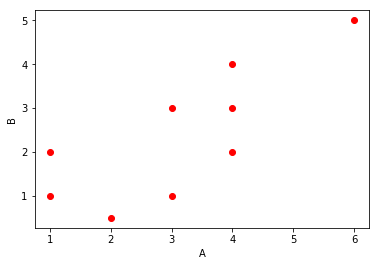

In [3]:
A = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
B = np.array([2, 1, 0.5, 1, 3, 3, 2, 5, 4])

result = np.dot(A, B)
print(f'The dot product of {A} and {B} is {result}')

plt.plot(A, B, 'ro')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

In [4]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(A, B)

print(f'The Mean Squared Error of A and B is {MSE}')

The Mean Squared Error of A and B is 1.4722222222222223


In [5]:
def compute_cost_function(n, t1, A, B):
    result = 0
    for i in range(0, n):
        result += pow((calculate_hypothesis(A[i], t1) - B[i]), 2)
    return result/(2*n)

print(f'Result :{compute_cost_function(9, 0.5, A, B)}')

Result :0.7916666666666666


In [6]:
def compute_modified_cost_function(n, t1, A, B):
    y = np.empty(len(t1), dtype = float)
    for j in range(0, len(t1)):
        result = 0
        for i in range(0, n):
            result += pow((calculate_hypothesis(A[i], t1[j]) - B[i]), 2)
        y[j] = result/(2*n)
    return y

t1 = [0.1, 0.3, 0.5, 0.7, 0.8]

result = np.empty(len(t1), dtype = int)
result = compute_modified_cost_function(9, t1, A, B)
    
print(f'Result :{y}')

Result :[1 1 2 2 3 2 3 4 3]


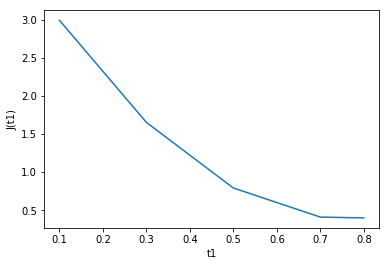

In [7]:
plt.plot(t1, result)
plt.xlabel('t1')
plt.ylabel('J(t1)')
plt.show()

## PART B : Linear Regression Implementation

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


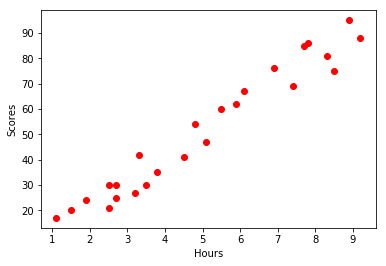

In [8]:
data = pd.read_csv('student_scores.csv')

print(data.shape)
print(data.head())

hours = data['Hours']
scores = data['Scores']

plt.plot(hours, scores, 'ro')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [9]:
def calculate_hypothesis(theta0, theta1, x):
    return theta0 + theta1*x

In [10]:
def gradient_descent(alpha, x, y, max_iter=1500):
    
    iter = 0
    
    theta = np.empty(len(y), dtype=np.float64)
    theta0 = 0
    theta1 = 0
    
    deriv0 = 0
    deriv1 = 0
    
    while(iter < max_iter):
        for i in range(0, len(x)):
            deriv0 += (calculate_hypothesis(theta0, theta1, x[i]) - y[i])
            
        temp0 = round(theta0 - (alpha*deriv0)/len(x))
        
        for i in range(0, len(x)):
            deriv1 += (calculate_hypothesis(theta0, theta1, x[i]) - y[i])*x[i]
            
        temp1 = round(theta1 - (alpha*deriv1)/len(x))
            
        theta0 = temp0
        theta1 = temp1
        
        theta[0] = theta0
        theta[1] = theta1
        
        iter+=1
        
    return theta

Theta0 : 5.0
Theta1 : 8.0


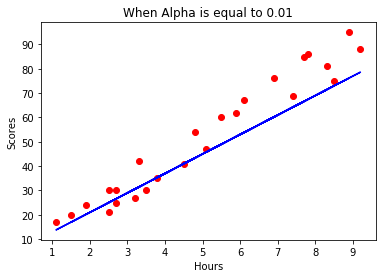

------------------------------------------
Theta0 : -0.0
Theta1 : 16.0


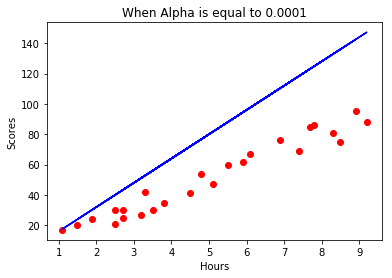

In [11]:
theta = gradient_descent(0.01, hours, scores, 1500)

print(f'Theta0 : {theta[0]}\nTheta1 : {theta[1]}')

plt.plot(hours, scores, 'ro')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('When Alpha is equal to 0.01')
y_pred = theta[0] + theta[1]*hours # predicted data
plt.plot(hours, y_pred, '-b')
plt.show()

print('------------------------------------------')

theta = gradient_descent(0.0001, hours, scores, 1500)

print(f'Theta0 : {theta[0]}\nTheta1 : {theta[1]}')

plt.plot(hours, scores, 'ro')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('When Alpha is equal to 0.0001')
y_pred = theta[0] + theta[1]*hours # predicted data

plt.plot(hours, y_pred, '-b')

plt.show()

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [22]:
hours = hours.reshape(-1, 1)
scores = scores.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(hours, scores, test_size=0.3, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


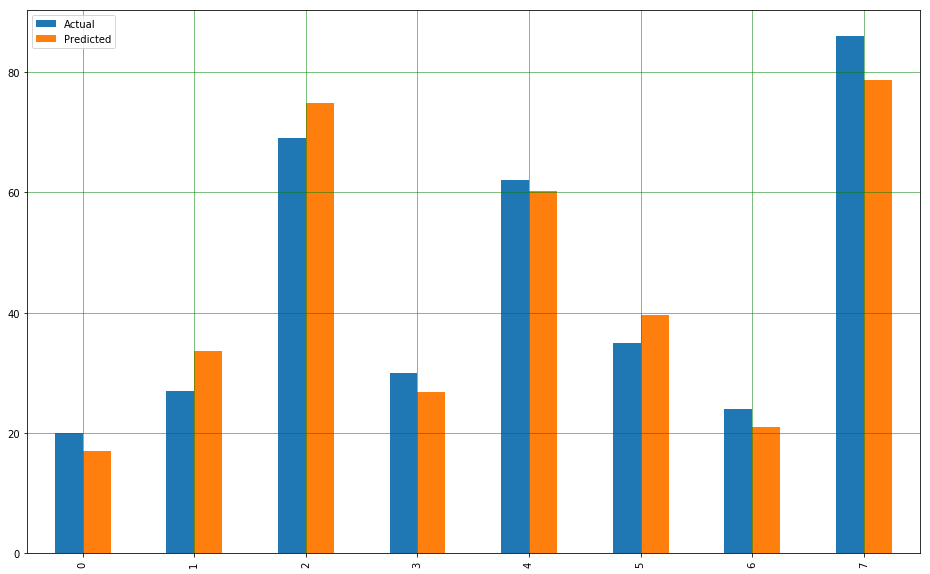

In [20]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

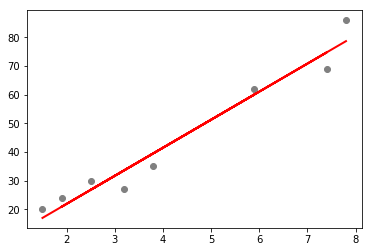

In [21]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Part C : Multivariate Linear Regression

In [23]:
data = pd.read_csv('petrol_consumption.csv')

print(data.shape)
print(data.head())

(48, 5)
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  


In [61]:
X = data.iloc[:, 0:4] #taking first 4 columns as feature vectors
print(X.head())
print(X.shape)
print()

Y = data['Petrol_Consumption'] #last column is taken as the output
print(Y.head())
print(Y.shape)

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)
0         9.0            3571            1976                         0.525
1         9.0            4092            1250                         0.572
2         9.0            3865            1586                         0.580
3         7.5            4870            2351                         0.529
4         8.0            4399             431                         0.544
(48, 4)

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64
(48,)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [63]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) # predicted value

In [67]:
df_petrol_consumption = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_petrol_consumption

,Actual,Predicted
29,534,468.315946
4,410,550.397078
26,577,590.639321
30,571,572.176794
32,577,649.893941
37,704,648.443789
34,487,515.198650
40,587,674.764637
7,467,503.476378
10,580,500.073610


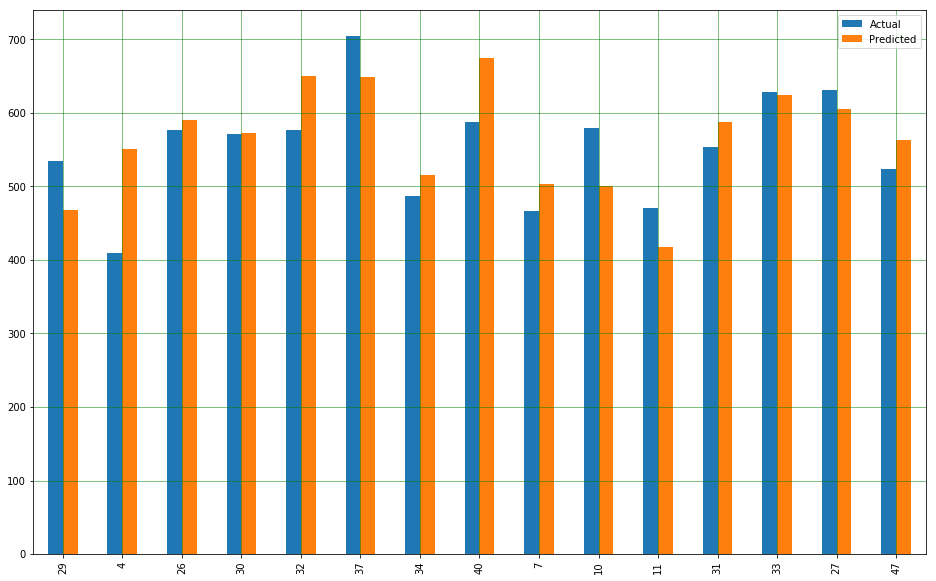

In [68]:
df2 = df_petrol_consumption.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()